# 1-Goemans-Williamson

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from algorithms import max_cut

LEFT_COLOR = 'blue'
RIGHT_COLOR = 'green'

## 1.1 Visualization & Analysis Tools

In [3]:
def visualize_cut(graph, cut):
    colors = []
    for vertex in graph.nodes():
        colors.append(LEFT_COLOR if vertex in cut.left else RIGHT_COLOR)
    nx.draw(graph, node_color=colors)

In [4]:
def compare_performance(generator, algorithms, trials):
    results = [[] for algorithm in algorithms]
    for _ in range(trials):
        graph = generator()
        for index, algorithm in enumerate(algorithms):
            cut = algorithm(graph)
            result = cut.evaluate_cut_size(graph)
            results[index].append(result)
    averages = [np.mean(result) for result in results]
    return averages

## 1.2 Max-Cut Algorithms on Various Graphs

### 1.2.1 Erdős–Rényi

In [5]:
BERNOULLI_PARAM = 0.5
GRAPH_SIZE = 20
bernoulli_graph = nx.generators.binomial_graph(GRAPH_SIZE, BERNOULLI_PARAM)

Cut size: 42


/Users/hermish/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


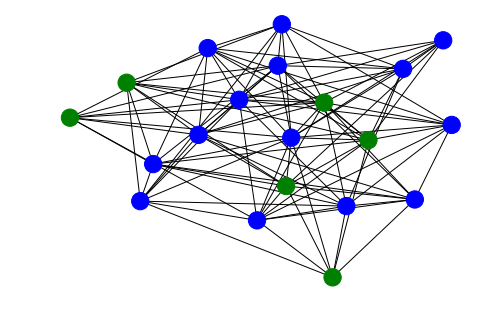

In [7]:
# Random Cut
random_cut = max_cut.random_cut(bernoulli_graph, 0.5)
visualize_cut(bernoulli_graph, random_cut)
random_result = random_cut.evaluate_cut_size(bernoulli_graph)
print('Cut size:', random_result)

Cut size: 65


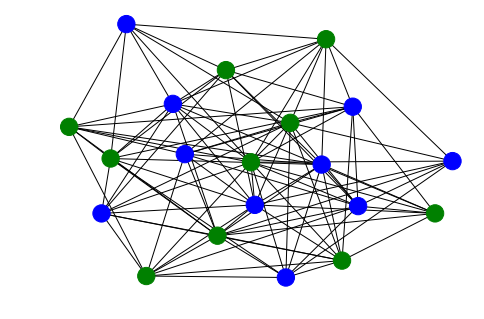

In [8]:
# Greedy Cut
greedy_cut = max_cut.greedy_max_cut(bernoulli_graph)
visualize_cut(bernoulli_graph, greedy_cut)
greedy_result = greedy_cut.evaluate_cut_size(bernoulli_graph)
print('Cut size:', greedy_result)

Cut size: 63


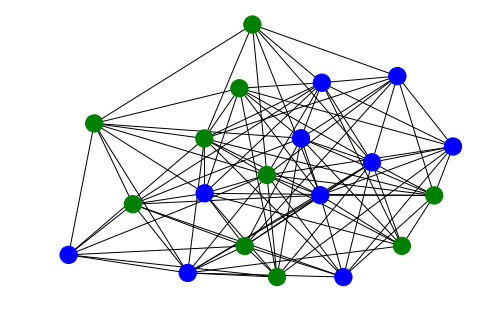

In [11]:
# Goemans Williamson Cut
sdp_cut = max_cut.goemans_williamson_weighted(bernoulli_graph)
visualize_cut(bernoulli_graph, sdp_cut)
sdp_result = sdp_cut.evaluate_cut_size(bernoulli_graph)
print('Cut size:', sdp_result)

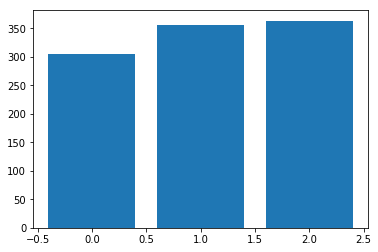

In [13]:
GRAPH_SIZE = 50
BERNOULLI_PARAM = 0.5
TRIALS = 100

generator = lambda: nx.generators.binomial_graph(GRAPH_SIZE, BERNOULLI_PARAM)
random_half = lambda graph: max_cut.random_cut(graph, 0.5)
algorithms = [random_half, max_cut.greedy_max_cut, max_cut.goemans_williamson_weighted]

# Comparison of Algorithms on Erdős–Rényi Graphs
results = compare_performance(generator, algorithms, TRIALS)
bar_index = np.arange(len(results))
plt.bar(bar_index, results)
plt.show()

### 1.2.2 Stochastic Block Model